In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns; sns.set();
from sklearn import datasets

In [6]:
import requests
import gmaps
import os
# Import API key
from gkey import gkey

In [73]:
# Import Basemap
from mpl_toolkits.basemap import Basemap

## Read CSV

In [9]:
licenses = "Resources/business-licenses.csv"
owners = "Resources/business-owners.csv"

In [10]:
license_df = pd.read_csv(licenses)
license_df.head()

C:\Users\junya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Historical Wards 2003-2015,Zip Codes,Census Tracts,Wards
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0


#### 1. Which company has the most number of business in Chicago

In [9]:
license_1 = license_df[['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS']]

In [10]:
license_1.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST


In [12]:
license_1['ACCOUNT NUMBER'].max()

464863

In [13]:
license_1['SITE NUMBER'].max()

532

In [19]:
license_1.groupby('LEGAL NAME').count().sort_values(["ID"], ascending=False)

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,DOING BUSINESS AS NAME,ADDRESS
LEGAL NAME,,,,,,
WALGREEN CO.,2801,2801,2801,2801,2801,2801
"BOND DRUG COMPANY OF ILLINOIS, LLC",2393,2393,2393,2393,2393,2393
SP PLUS CORPORATION,2240,2240,2240,2240,2240,2240
STARBUCKS CORPORATION,2133,2133,2133,2133,2133,2133
AMERICAN DRUG STORES LLC,1889,1889,1889,1889,1889,1889
...,...,...,...,...,...,...
KEYS TRANSPORTATION,1,1,1,1,1,1
KEYON M. GASKIN,1,1,1,1,1,1
KEYNO CHATEAU SMALL,1,1,1,1,1,1


In [20]:
license_1.groupby('DOING BUSINESS AS NAME').count().sort_values(["ID"], ascending=False)

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,ADDRESS
DOING BUSINESS AS NAME,,,,,,
7-ELEVEN,1636,1636,1636,1636,1636,1636
SUBWAY,1544,1544,1544,1544,1544,1544
DUNKIN DONUTS,1111,1111,1111,1111,1111,1111
ALLIED WASTE OF CHICAGO,967,967,967,967,967,967
JACKSON HEWITT TAX SERVICE,904,904,904,904,904,904
...,...,...,...,...,...,...
DYNASTY FITNESS CENTER,1,1,1,1,1,1
REAL ESTATE SERVICES,1,1,1,1,1,1
REAL GOOD FOOD & CATERING,1,1,1,1,1,1


#### 3. Application type distribution

In [4]:
for i in license_df.columns:
    print(i)

ID
LICENSE ID
ACCOUNT NUMBER
SITE NUMBER
LEGAL NAME
DOING BUSINESS AS NAME
ADDRESS
CITY
STATE
ZIP CODE
WARD
PRECINCT
WARD PRECINCT
POLICE DISTRICT
LICENSE CODE
LICENSE DESCRIPTION
BUSINESS ACTIVITY ID
BUSINESS ACTIVITY
LICENSE NUMBER
APPLICATION TYPE
APPLICATION CREATED DATE
APPLICATION REQUIREMENTS COMPLETE
PAYMENT DATE
CONDITIONAL APPROVAL
LICENSE TERM START DATE
LICENSE TERM EXPIRATION DATE
LICENSE APPROVED FOR ISSUANCE
DATE ISSUED
LICENSE STATUS
LICENSE STATUS CHANGE DATE
SSA
LATITUDE
LONGITUDE
LOCATION
Community Areas
Historical Wards 2003-2015
Zip Codes
Census Tracts
Wards


In [10]:
license_3 = license_df[['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'APPLICATION TYPE']]

In [11]:
license_3.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1475,Consumption on Premises - Incidental Activity,RENEW
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1475,Consumption on Premises - Incidental Activity,RENEW
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1475,Consumption on Premises - Incidental Activity,RENEW
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1006,Retail Food Establishment,RENEW
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1475,Consumption on Premises - Incidental Activity,RENEW


In [9]:
license_3_1 = license_3.groupby(["LICENSE CODE", "LICENSE DESCRIPTION"]).count().sort_values(['ID'], ascending=False)
license_3_1.head()

,,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME
LICENSE CODE,LICENSE DESCRIPTION,,,,,
1010,Limited Business License,417758,417758,417758,417758,417754
1006,Retail Food Establishment,147916,147916,147916,147916,147916
1781,Tobacco,44865,44865,44865,44865,44865
4404,Regulated Business License,43334,43334,43334,43334,43334
1475,Consumption on Premises - Incidental Activity,31327,31327,31327,31327,31327


In [13]:
license_3_count = license_3.groupby("APPLICATION TYPE").count().sort_values(['ID'], ascending=False)
license_3_count.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,LICENSE CODE,LICENSE DESCRIPTION
APPLICATION TYPE,,,,,,,
RENEW,753856,753856,753856,753856,753853,753856,753856
ISSUE,222901,222901,222901,222901,222900,222901,222901
C_LOC,12697,12697,12697,12697,12697,12697,12697
C_EXPA,713,713,713,713,713,713,713
C_CAPA,486,486,486,486,486,486,486


In [28]:
license_3_rate = license_3_count[['ID']]
license_3_rate = license_3_rate.rename(columns={'ID':'Count'})
total_count = license_3_count['ID'].sum()

license_3_rate['Rate'] = [(f'{round(i/total_count * 100)}%') for i in license_3_rate['Count']]

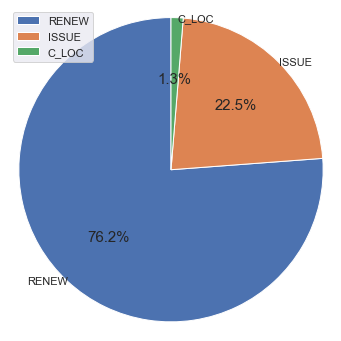

In [69]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = license_3_rate.head(3).index
data = license_3_rate['Count'].head(3)
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(data, autopct='%1.1f%%', startangle=90, pctdistance=0.6, labels=labels, labeldistance=1)
plt.legend(labels, loc="best")
#draw the middle circle
# centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
# plt.savefig(f"Catagory Pie Chart.png")
plt.show()

In [32]:
license_3_3 = license_3['APPLICATION TYPE'].value_counts()
license_3_3

RENEW     753856
ISSUE     222901
C_LOC      12697
C_EXPA       713
C_CAPA       486
Name: APPLICATION TYPE, dtype: int64

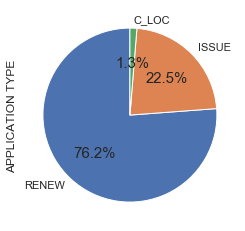

In [83]:
license_3_3.head(3).plot.pie( autopct='%1.1f%%',pctdistance=0.6,startangle=90)
# plt.pie(data, autopct='%1.1f%%', startangle=90, pctdistance=0.6);

#### 5. Boxplot (Zip code)

In [118]:
# Filter the Zip Code only limitted to Chicago
license_5 = license_df.loc[license_df['CITY'] == 'CHICAGO']
license_5.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Historical Wards 2003-2015,Zip Codes,Census Tracts,Wards
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0


In [119]:
license_5_df = license_5[['ZIP CODE', 'ID']].copy()
license_5_df.dtypes

ZIP CODE    object
ID          object
dtype: object

In [120]:
license_5_df['ZIP CODE'] = license_5_df['ZIP CODE'].astype(float)
license_5_df.dtypes

ZIP CODE    float64
ID           object
dtype: object

In [122]:
license_5_df['ZIP CODE'] = license_5_df['ZIP CODE'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [121]:
license_5_df['ZIP CODE']

0         60603.0
1         60603.0
2         60603.0
3         60603.0
4         60603.0
           ...   
991112    60619.0
991113    60612.0
991114    60652.0
991115    60645.0
991116    60660.0
Name: ZIP CODE, Length: 918218, dtype: float64

In [99]:
license_5_1 = license_5_df['ZIP CODE'].value_counts()
license_5_1

60618      18504
60611.0    18393
60608      18034
60647      17158
60618.0    16719
           ...  
60805          1
60471          1
60131          1
60014.0        1
60445.0        1
Name: ZIP CODE, Length: 148, dtype: int64

In [61]:
a = pd.DataFrame(license_5_1)
a.head()

,ZIP CODE
60618,28391
60611,25854
60614,25488
60647,25361
60608,24797


In [62]:
a = a.reset_index()
a = a.rename(columns={'index':'Zip_code', 'ZIP CODE':'Count'})
a.head()

,Zip_code,Count
0,60618,28391
1,60611,25854
2,60614,25488
3,60647,25361
4,60608,24797


In [69]:
b = a.loc[a['Count'] > 50]
b.head()

,Zip_code,Count
0,60618,28391
1,60611,25854
2,60614,25488
3,60647,25361
4,60608,24797


In [93]:
c = b.loc[b['Zip_code'] == '60618']
c

,Zip_code,Count
0,60618,28391
45,60618,6832


In [70]:
b.Zip_code = b.Zip_code.astype(str)
b.dtypes

C:\Users\junya\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Zip_code    object
Count        int64
dtype: object

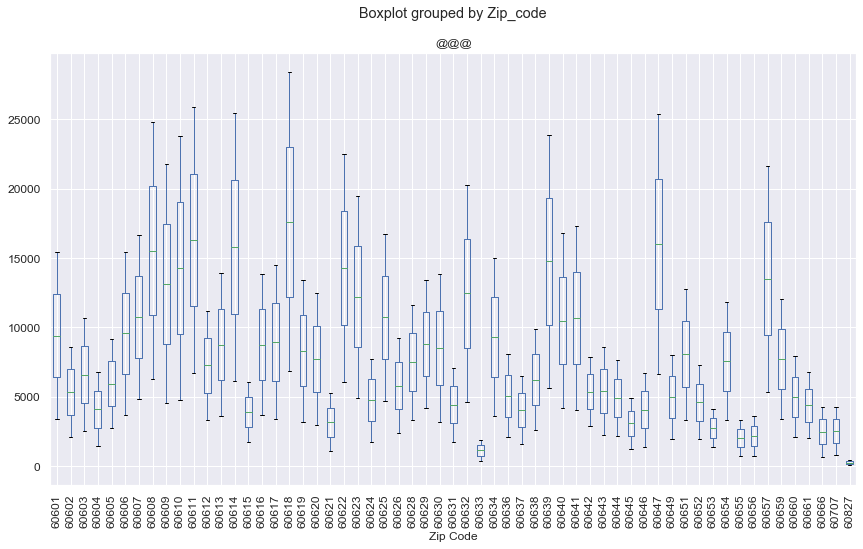

In [71]:
b.boxplot("Count", by="Zip_code", figsize=(14, 8), fontsize=12)
# plt.scatter(a['Zip_code'], a['Count'], label='#$#', marker='.', color='g' )
plt.title("@@@")
plt.xlabel("Zip Code", fontsize=12)
# plt.ylabel("Number of Tickets per 1,000 Vehicles", fontsize=12)
plt.xticks(rotation=90)

# annotate the top 5 locations
# plt.annotate('Cicero x Lawrence', (17,15.4), fontsize=12)
# plt.annotate('W Foster x North Branch Chicago River', (26,8.2), fontsize=12)
# plt.annotate('W Jackson x Columbus Park', (38,15), fontsize=12)
# plt.annotate('445 W 127th St', (24,10.5), fontsize=12)
# plt.annotate('W Ogden and Douglas Park', (6,12), fontsize=12)

# save fig
# plt.savefig("BoxPlotbyZipCode.png")

# show figure
plt.show()

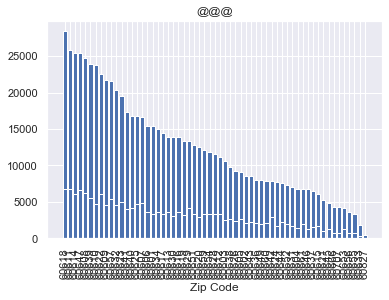

In [90]:
plt.bar(b["Zip_code"],b["Count"])
# plt.scatter(a['Zip_code'], a['Count'], label='#$#', marker='.', color='g' )
plt.title("@@@")
plt.xlabel("Zip Code", fontsize=12)
# plt.ylabel("Number of Tickets per 1,000 Vehicles", fontsize=12)
plt.xticks(rotation=90)

# annotate the top 5 locations
# plt.annotate('Cicero x Lawrence', (17,15.4), fontsize=12)
# plt.annotate('W Foster x North Branch Chicago River', (26,8.2), fontsize=12)
# plt.annotate('W Jackson x Columbus Park', (38,15), fontsize=12)
# plt.annotate('445 W 127th St', (24,10.5), fontsize=12)
# plt.annotate('W Ogden and Douglas Park', (6,12), fontsize=12)

# save fig
# plt.savefig("BoxPlotbyZipCode.png")

# show figure
plt.show()

#### 6. Map (Zip code)

In [75]:
# Access maps with API key
gmaps.configure(api_key=gkey)
license_6_df = pd.DataFrame(license_5_1)

In [76]:
license_6_df = license_6_df.reset_index()
license_6_df_1 = license_6_df.rename(columns={'index':'Zip Code', 'ZIP CODE':'Counts'})

In [77]:
license_6_df_1.head()

,Zip Code,Counts
0,60618,28391
1,60611,25854
2,60614,25488
3,60647,25361
4,60608,24797


In [104]:
# Customize the size of the figure
fig = gmaps.figure()

# Assign the marker layer to a variable
markers = gmaps.marker_layer(license_5_df_1)
# Add the layer to the map
fig.add_layer(markers)
fig

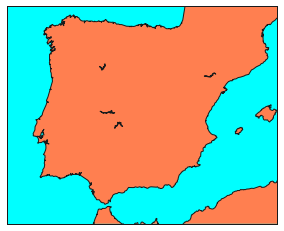

In [83]:

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(llcrnrlon=-10.5,llcrnrlat=35,urcrnrlon=4.,urcrnrlat=44.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = -3.25)
 
my_map.drawcoastlines()
my_map.drawmapboundary(fill_color='aqua')
my_map.fillcontinents(color='coral',lake_color='aqua')


 
plt.show()

In [3]:
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)